# Healthcare Capstone Project - Diabetes 

### Problem Statement: 
- NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
- The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
- Build a model to accurately predict whether the patients in the dataset have diabetes or not.

### Dataset Description: 
The datasets consists of several medical predictor variables and one target variable(Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

### Variables- Description: 
- Pregnancies - Number of times pregnant
- Glucose - Plasma glucose concentration in an oral glucose tolerance test
- BloodPressure - Diastolic blood pressure (mm Hg)
- SkinThickness - Triceps skinfold thickness (mm)
- Insulin - Two hour serum insulin
- BMI - Body Mass Index
- DiabetesPedigreeFunction - Diabetes pedigree function
- Age - Age in years
- Outcome - Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

## Project Task: Week 1

### Data Exploration:

In [2]:
diabetes = pd.read_csv('health care diabetes.csv')

In [3]:
diabetes.shape

(768, 9)

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI


In [6]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
glucose_NA = diabetes[diabetes['Glucose']==0]

In [8]:
glucose_NA

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [9]:
null_variables = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [10]:
for col in null_variables: 
    for i in range(len(diabetes[col])):
        if diabetes[col][i] == 0:
            diabetes[col][i] = np.nan

In [11]:
diabetes.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 2. Visually explore these variables using histograms. Treat the missing values accordingly.



In [13]:
diabetes['Glucose'].value_counts().head()

99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
Name: Glucose, dtype: int64

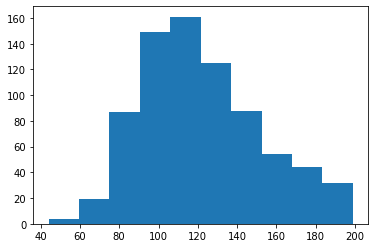

In [14]:
plt.hist(diabetes['Glucose'])
plt.show()

In [15]:
diabetes['BloodPressure'].value_counts().head()

70.0    57
74.0    52
78.0    45
68.0    45
72.0    44
Name: BloodPressure, dtype: int64

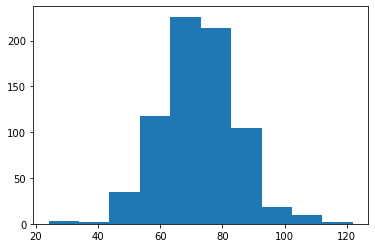

In [16]:
plt.hist(diabetes['BloodPressure'])
plt.show()

In [17]:
diabetes['SkinThickness'].value_counts().head()

32.0    31
30.0    27
27.0    23
23.0    22
28.0    20
Name: SkinThickness, dtype: int64

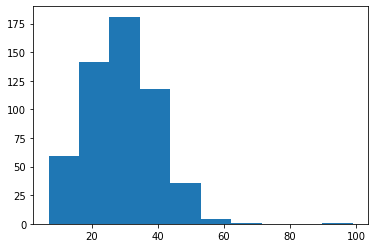

In [18]:
plt.hist(diabetes['SkinThickness'])
plt.show()

In [19]:
diabetes['Insulin'].value_counts().head()

105.0    11
130.0     9
140.0     9
120.0     8
94.0      7
Name: Insulin, dtype: int64

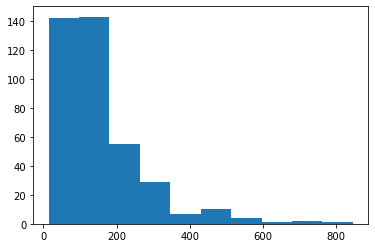

In [20]:
plt.hist(diabetes['Insulin'])
plt.show()

In [21]:
diabetes['BMI'].value_counts().head()

32.0    13
31.6    12
31.2    12
32.4    10
33.3    10
Name: BMI, dtype: int64

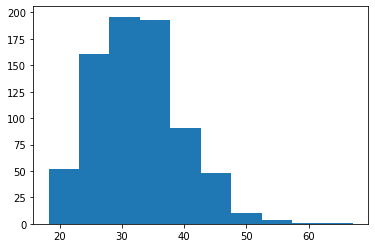

In [22]:
plt.hist(diabetes['BMI'])
plt.show()

In [23]:
positive = diabetes[diabetes['Outcome']==1]
negative = diabetes[diabetes['Outcome']==0]

In [24]:
positive.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.00,266.00,252.00,180.00,130.00,266.00,268.00,268.00,268.0
mean,4.87,142.32,75.32,33.00,206.85,35.41,0.55,37.07,1.0
std,3.74,29.60,12.30,10.33,132.70,6.61,0.37,10.97,0.0
min,0.00,78.00,30.00,7.00,14.00,22.90,0.09,21.00,1.0
25%,1.75,119.00,68.00,27.00,127.50,30.90,0.26,28.00,1.0
50%,4.00,140.00,74.50,32.00,169.50,34.30,0.45,36.00,1.0
75%,8.00,167.00,84.00,39.00,239.25,38.92,0.73,44.00,1.0
max,17.00,199.00,114.00,99.00,846.00,67.10,2.42,70.00,1.0


In [25]:
negative.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.00,497.00,481.00,361.00,264.00,491.00,500.00,500.00,500.0
mean,3.30,110.64,70.88,27.24,130.29,30.86,0.43,31.19,0.0
std,3.02,24.78,12.16,10.03,102.48,6.56,0.30,11.67,0.0
min,0.00,44.00,24.00,7.00,15.00,18.20,0.08,21.00,0.0
25%,1.00,93.00,62.00,19.00,66.00,25.60,0.23,23.00,0.0
50%,2.00,107.00,70.00,27.00,102.50,30.10,0.34,27.00,0.0
75%,5.00,125.00,78.00,33.00,161.25,35.30,0.56,37.00,0.0
max,13.00,197.00,122.00,60.00,744.00,57.30,2.33,81.00,0.0


In [26]:
#fill the null values by the mean of the column based on outcome
diabetes.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [27]:
null_variables

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [28]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [29]:
#Filling the NAN value by the mean of the corresponding class: 

In [30]:
diabetes[diabetes['Outcome']==1] = diabetes[diabetes['Outcome']==1].fillna(diabetes[diabetes['Outcome']==1].mean())
diabetes[diabetes['Outcome']==0] = diabetes[diabetes['Outcome']==0].fillna(diabetes[diabetes['Outcome']==0].mean())

In [31]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [32]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.0,130.287879,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,33.0,206.846154,30.1,0.349,47,1


### 4. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.


In [33]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

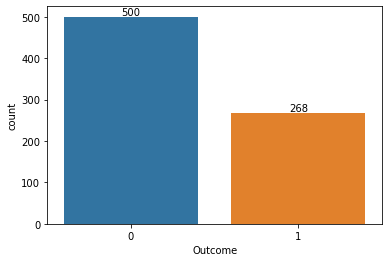

In [34]:
fig = sns.countplot(diabetes['Outcome'])
for i in fig.containers:
    fig.bar_label(i)
plt.show()

In [35]:
### ANALYSIS


### 5. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.


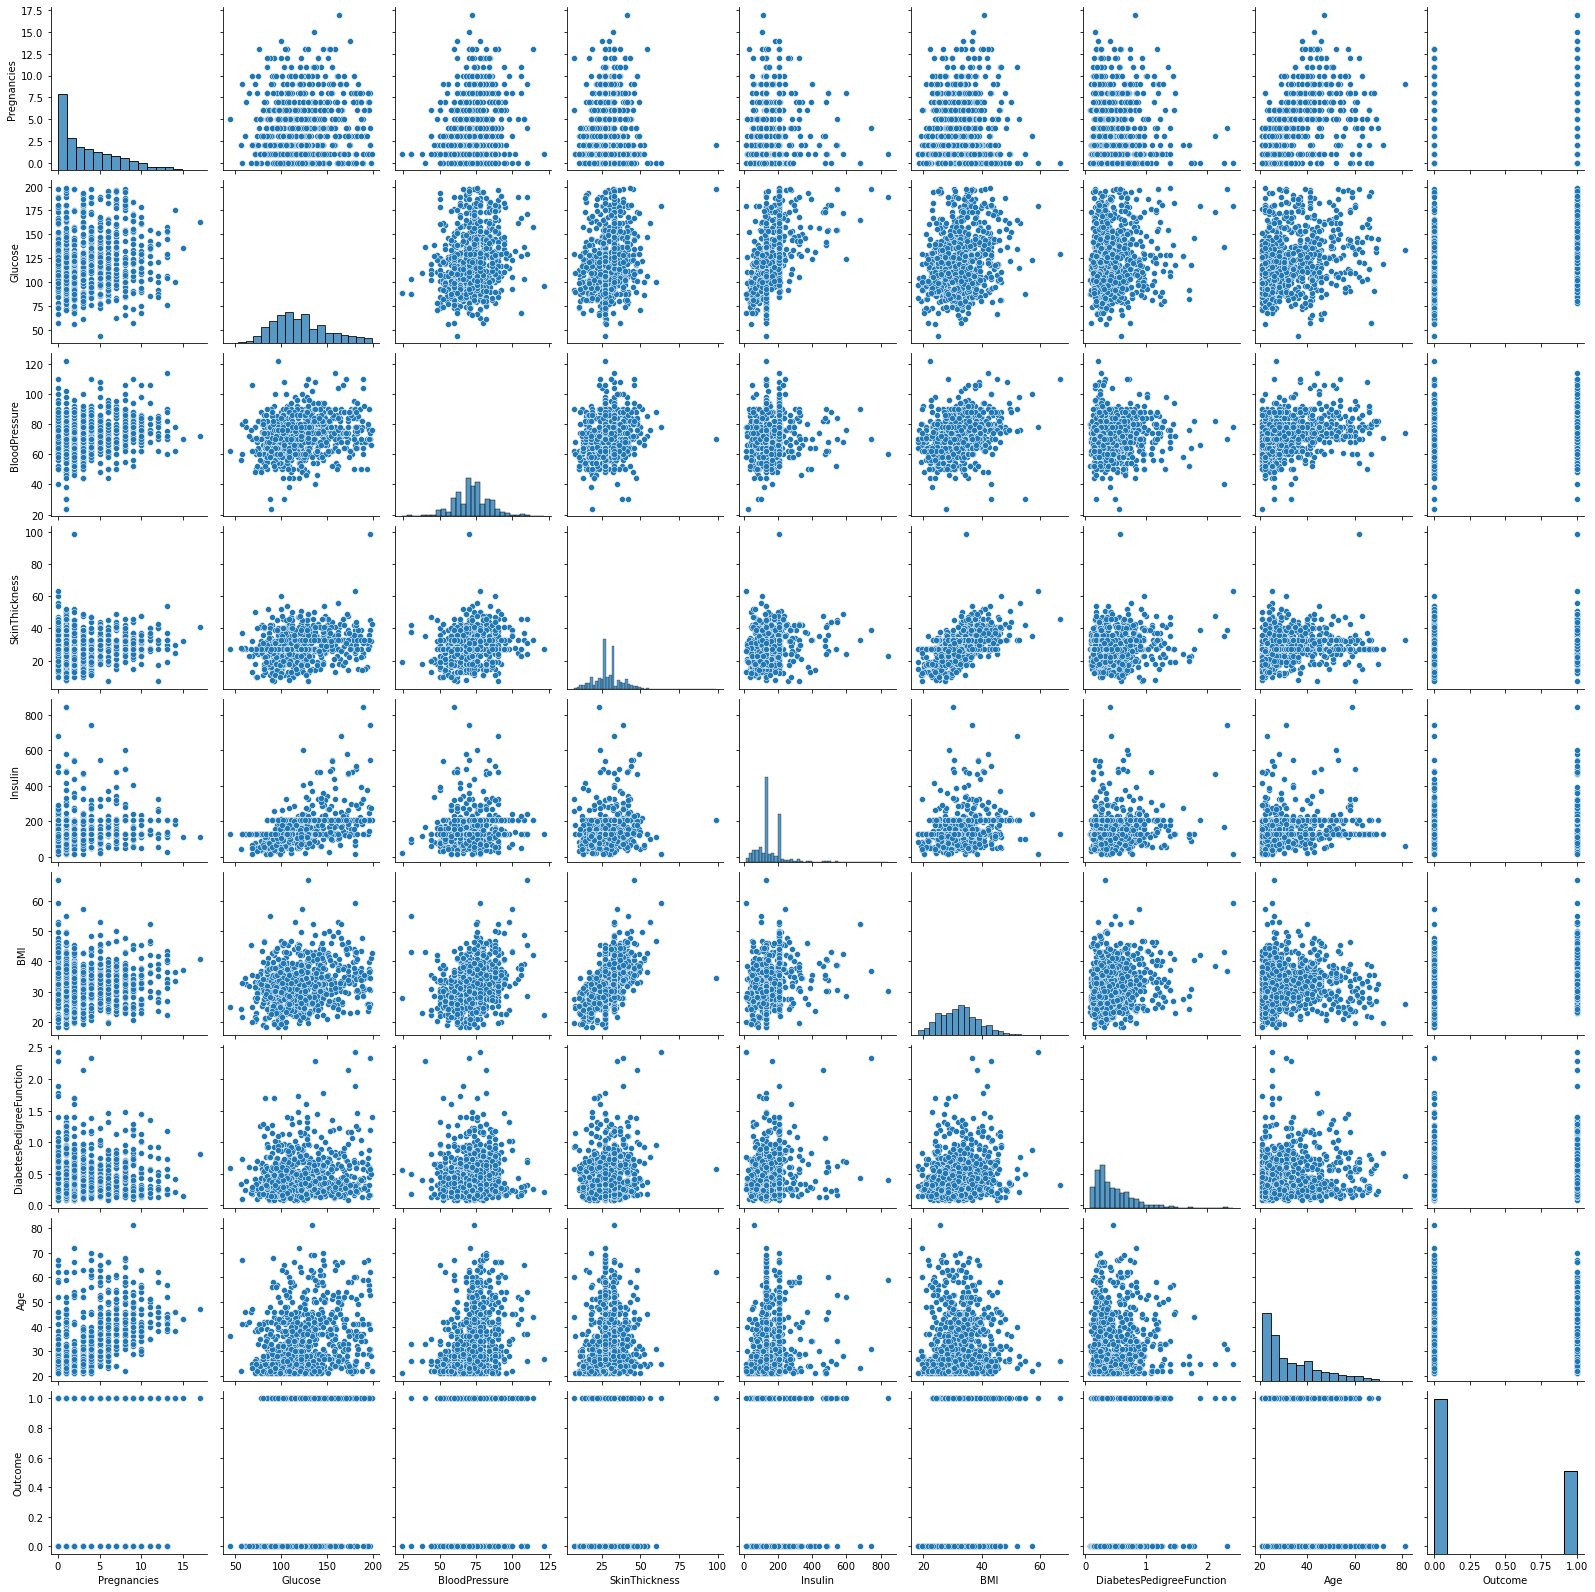

In [36]:
sns.pairplot(diabetes)
plt.show()

In [37]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129867,0.208935,0.094172,0.093546,0.024127,-0.033523,0.544341,0.221898
Glucose,0.129867,1.000000,0.224356,0.235040,0.497789,0.235253,0.138125,0.268566,0.495954
BloodPressure,0.208935,0.224356,1.000000,0.203453,0.099996,0.286518,-0.002264,0.324439,0.175087
SkinThickness,0.094172,0.235040,0.203453,1.000000,0.212573,0.565443,0.102426,0.135916,0.308094
Insulin,0.093546,0.497789,0.099996,0.212573,1.000000,0.231533,0.121716,0.165149,0.410918
BMI,0.024127,0.235253,0.286518,0.565443,0.231533,1.000000,0.152530,0.027578,0.315271
DiabetesPedigreeFunction,-0.033523,0.138125,-0.002264,0.102426,0.121716,0.152530,1.000000,0.033561,0.173844
Age,0.544341,0.268566,0.324439,0.135916,0.165149,0.027578,0.033561,1.000000,0.238356
Outcome,0.221898,0.495954,0.175087,0.308094,0.410918,0.315271,0.173844,0.238356,1.000000


We can see below that there is a correlation between the following variables (however, not that strong):
- Insulin - Glucose
- Age - Pregnancies 
- Skin Thickeness - BMI

### 6. Perform correlation analysis. Visually explore it using a heat map.

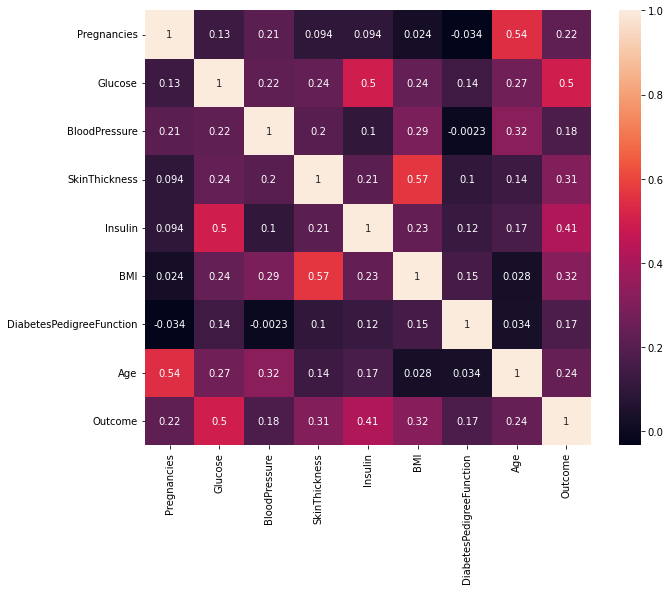

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(diabetes.corr(), annot=True)
plt.show()

## Project Task: Week 2

### Data Modeling:

#### 4. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

#### 5. Apply an appropriate classification algorithm to build a model.

#### 6. Compare various models with the results from KNN algorithm.

#### 7. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

Please be descriptive to explain what values of these parameter you have used.

### 4. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

#### We will be training and comparing the following models: 
1. Logistic Regression 
2. Decision Tree
3. Random Forest Classifier
4. KNN (K-Nearest Neighbor
5. SVM (Support Vector Machine)
6. Naive Bayes

In [40]:
#X,y split
X = diabetes.drop('Outcome',axis=1)
y= diabetes['Outcome']

In [41]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.0,130.287879,36.8,0.340,27
765,5,121.0,72.0,23.0,112.000000,26.2,0.245,30
766,1,126.0,60.0,33.0,206.846154,30.1,0.349,47


In [84]:
#train test split
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, confusion_matrix, classification_report, auc, roc_curve, roc_auc_score, precision_recall_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(537, 8) (231, 8) (537,) (231,)


In [43]:
#standardization

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [56]:
models = []
model_accuracy = []
model_f1 = []
model_auc = []

#### Model #1: Logistic Regression

In [48]:
#diabetes.to_csv('diabetes_final_data.csv', index=False)

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[141,  16],
       [ 36,  38]])

In [75]:
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7748917748917749
0.59375


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       157
           1       0.70      0.51      0.59        74

    accuracy                           0.77       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.77      0.77      0.76       231



#### Performance evaluation and optimizing parameters using GridSearchCV: 
Logistic regression does not really have any critical hyperparameters to tune. However we will try to optimize one of its parameters 'C' with the help of GridSearchCV. So we have set this parameter as a list of values form which GridSearchCV will select the best value of parameter.



In [64]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [65]:
parameters = {'C':np.logspace(-5, 5, 50)}

In [67]:
gs_lr = GridSearchCV(lr, param_grid = parameters, cv=5, verbose=0)
gs_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-02, 4.714866...
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])})

In [68]:
gs_lr.best_params_

{'C': 0.011513953993264481}

In [69]:
gs_lr.best_score_

0.7914676358601593

In [76]:
lr2 = LogisticRegression(C=0.011513953993264481)

In [77]:
lr2.fit(X_train, y_train)

LogisticRegression(C=0.011513953993264481)

In [78]:
y_pred2 = lr2.predict(X_test)

In [80]:
confusion_matrix(y_test, y_pred2)

array([[146,  11],
       [ 40,  34]])

In [79]:
print(accuracy_score(y_test, y_pred2))
print(f1_score(y_test, y_pred2))

0.7792207792207793
0.5714285714285715


In [82]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       157
           1       0.76      0.46      0.57        74

    accuracy                           0.78       231
   macro avg       0.77      0.69      0.71       231
weighted avg       0.78      0.78      0.76       231



AUC: 0.500


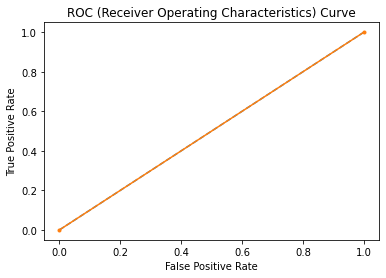

In [206]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = lr2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_lr = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_lr)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.571 auc_pr=0.660 ap=0.320


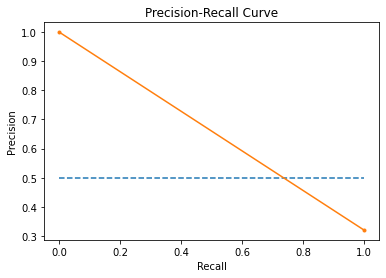

In [207]:
# Precision Recall Curve 

pred_y_test = lr2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, y_pred2)                                    # calculate F1 score
auc_lr_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_lr_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [208]:
models.append('LR')
model_accuracy.append(accuracy_score(y_test, y_pred2))
model_f1.append(f1)
model_auc.append(auc_lr)

#### Model #2: Decision Tree

In [209]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

In [210]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [211]:
dt_y_pred = dt.predict(X_test)

In [212]:
print(accuracy_score(y_test, dt_y_pred))
print(f1_score(y_test, dt_y_pred))

0.8484848484848485
0.761904761904762


#### Performace evaluation and optimizing parameters using GridSearchCV: 

In [213]:
parameters = {'max_depth': [1,2,3,4,5,None]}

In [214]:
gs_dt = GridSearchCV(dt, param_grid = parameters, cv=5, verbose=0)
gs_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None]})

In [215]:
gs_dt.best_params_

{'max_depth': 2}

In [216]:
gs_lr.best_score_

0.7914676358601593

In [217]:
dt.feature_importances_

array([0.01691615, 0.11614489, 0.01435054, 0.05318574, 0.53053692,
       0.10404301, 0.064324  , 0.10049876])

In [218]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

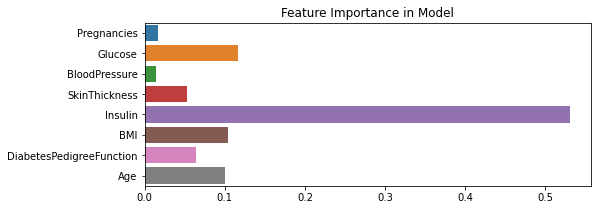

In [219]:
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=dt.feature_importances_)
plt.title('Feature Importance in Model');

In [220]:
dt2 = DecisionTreeClassifier(max_depth=2)

In [221]:
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [222]:
dt_y_pred2 = dt2.predict(X_test)

In [223]:
print(accuracy_score(y_test, dt_y_pred2))
print(f1_score(y_test, dt_y_pred2))

0.8181818181818182
0.6666666666666666


AUC: 0.869


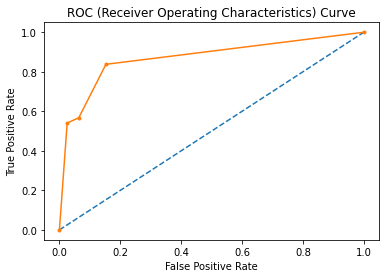

In [224]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = dt2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_dt = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_dt)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.667 auc_pr=0.830 ap=0.760


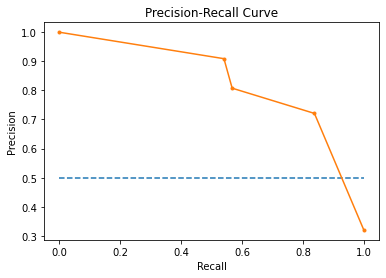

In [225]:
# Precision Recall Curve 

pred_y_test = dt2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, dt_y_pred2)                                    # calculate F1 score
auc_dt_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_dt_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [226]:
models.append('DT')
model_accuracy.append(accuracy_score(y_test, dt_y_pred2))
model_f1.append(f1)
model_auc.append(auc_dt)

#### Model #3: RandomForest Classifier

In [227]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(random_state=0)

In [228]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [229]:
rf_y_pred = rf.predict(X_test)

In [230]:
print(accuracy_score(y_test, rf_y_pred))
print(f1_score(y_test, rf_y_pred))

0.8874458874458875
0.8194444444444444


#### Performance evaluation and optimizing parameters using GridSearchCV

In [231]:
parameters = {
    'max_depth':[1,2,3,4,5,None]
}

In [232]:
gs_rf = GridSearchCV(estimator=rf, param_grid = parameters, cv=5, verbose=0)
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None]})

In [233]:
gs_rf.best_params_

{'max_depth': None}

In [234]:
gs_rf.best_score_

0.8732952578746971

In [235]:
rf.feature_importances_

array([0.05665037, 0.17350198, 0.05076236, 0.13152665, 0.32579537,
       0.09098059, 0.07372852, 0.09705417])

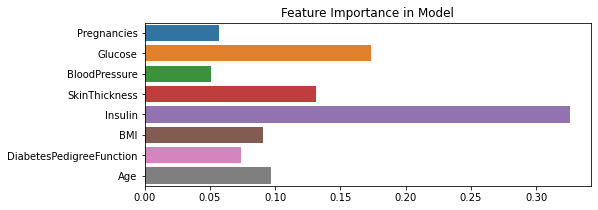

In [236]:
plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=rf.feature_importances_);
plt.title("Feature Importance in Model");

In [237]:
rf2 = RandomForestClassifier(max_depth=None)

In [238]:
rf2.fit(X_train, y_train)

RandomForestClassifier()

In [239]:
rf_y_pred2 = rf2.predict(X_test)

In [240]:
print(accuracy_score(y_test, rf_y_pred2))
print(f1_score(y_test, rf_y_pred2))

0.8917748917748918
0.8299319727891157


AUC: 0.951


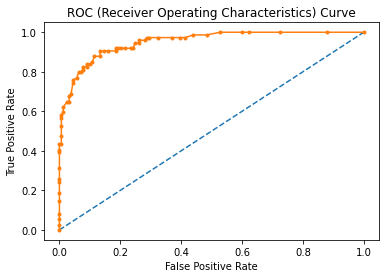

In [242]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = rf2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_rf = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_rf)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.830 auc_pr=0.917 ap=0.916


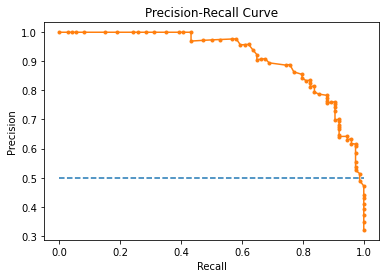

In [243]:
# Precision Recall Curve 

pred_y_test = rf2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, rf_y_pred2)                                    # calculate F1 score
auc_rf_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_rf_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [244]:
models.append('RF')
model_accuracy.append(accuracy_score(y_test, rf_y_pred2))
model_f1.append(f1)
model_auc.append(auc_dt)

#### Model #4: K-Nearest Neighbor (KNN) Classification:

In [245]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)

In [246]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [247]:
knn_y_pred = knn.predict(X_test)

In [248]:
print(accuracy_score(y_test, knn_y_pred))
print(f1_score(y_test, knn_y_pred))

0.8528138528138528
0.7671232876712328


#### Performance evaluation and optimizing parameters using GridSearchCV:

In [249]:
knn_neighbors = [i for i in range(2,16)]
parameters = {'n_neighbors': knn_neighbors}

In [250]:
gs_knn = GridSearchCV(estimator=knn, param_grid=parameters, cv=5, verbose=0)
gs_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [251]:
gs_knn.best_params_

{'n_neighbors': 11}

In [252]:
gs_knn.best_score_

0.8528210453444098

In [253]:
gs_knn.cv_results_['mean_test_score']

array([0.83418138, 0.81363794, 0.82481828, 0.83599862, 0.84536172,
       0.84534441, 0.84164071, 0.84165801, 0.84534441, 0.85282105,
       0.84345794, 0.83975424, 0.83973693, 0.83419868])

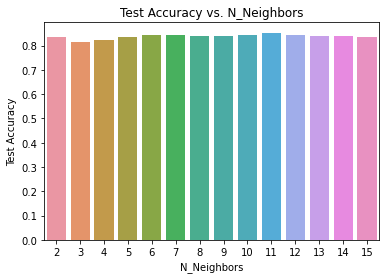

In [254]:
plt.figure(figsize=(6,4))
sns.barplot(x=knn_neighbors, y=gs_knn.cv_results_['mean_test_score'])
plt.xlabel("N_Neighbors")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. N_Neighbors");

In [255]:
knn2 = KNeighborsClassifier(n_neighbors=3)

In [256]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [257]:
knn_y_pred2 = knn2.predict(X_test)

In [258]:
print(accuracy_score(y_test, knn_y_pred2))
print(f1_score(y_test, knn_y_pred2))

0.8528138528138528
0.7671232876712328


AUC: 0.885


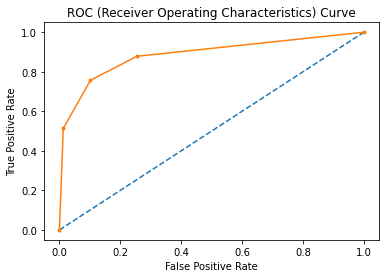

In [262]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = knn2.predict_proba(X_test)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_knn = roc_auc_score(y_test, probs)           # calculate AUC
print('AUC: %.3f' %auc_knn)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.767 auc_pr=0.853 ap=0.791


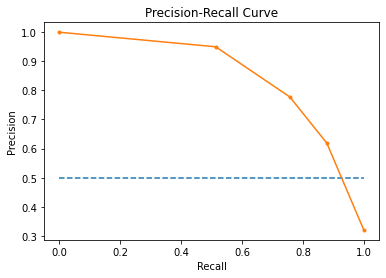

In [263]:
# Precision Recall Curve 

pred_y_test = knn2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, knn_y_pred2)                                    # calculate F1 score
auc_knn_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_knn_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [264]:
models.append('KNN')
model_accuracy.append(accuracy_score(y_test, knn_y_pred2))
model_f1.append(f1)
model_auc.append(auc_knn)

#### Model #5: Support Vector Machine (SVM) Algorithm:

In [265]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')

In [266]:
svm.fit(X_train, y_train)

SVC()

In [267]:
svm_y_pred = svm.predict(X_test)

In [268]:
print(accuracy_score(y_test, svm_y_pred))
print(f1_score(y_test, svm_y_pred))

0.8571428571428571
0.7755102040816327


#### Performance evaluation and optimizing parameters using GridSearchCV:

In [269]:
parameters = {
    'C':[1, 5, 10, 15, 20, 25],
    'gamma':[0.001, 0.005, 0.0001, 0.00001]
}

In [270]:
gs_svm = GridSearchCV(estimator=svm, param_grid=parameters, cv=5, verbose=0)
gs_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25],
                         'gamma': [0.001, 0.005, 0.0001, 1e-05]})

In [271]:
gs_svm.best_params_

{'C': 5, 'gamma': 0.001}

In [272]:
gs_svm.best_score_

0.8546728971962617

In [273]:
svm2 = SVC(kernel='rbf', C=20, gamma=0.001, probability=True)

In [274]:
svm2.fit(X_train, y_train)

SVC(C=20, gamma=0.001, probability=True)

In [275]:
svm_y_pred2 = svm2.predict(X_test)

In [276]:
print(accuracy_score(y_test, svm_y_pred2))
print(f1_score(y_test, svm_y_pred2))

0.8051948051948052
0.6853146853146853


AUC: 0.851


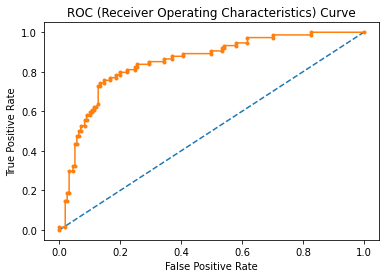

In [277]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = svm2.predict_proba(X_test)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_svm = roc_auc_score(y_test, probs)           # calculate AUC
print('AUC: %.3f' %auc_svm)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.685 auc_pr=0.685 ap=0.691


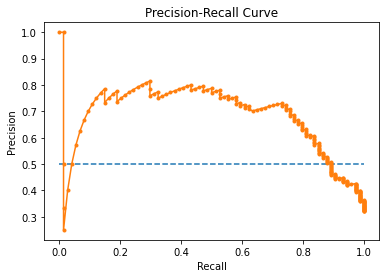

In [278]:
# Precision Recall Curve 

pred_y_test = svm2.predict(X_test)                                    # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, svm_y_pred2)                                    # calculate F1 score
auc_svm_pr = auc(recall, precision)                                   # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_svm_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [279]:
models.append('SVM')
model_accuracy.append(accuracy_score(y_test, svm_y_pred2))
model_f1.append(f1)
model_auc.append(auc_svm)

#### Model #6: Naive Bayes Algorithm:

In [280]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()

In [281]:
gnb.fit(X_train, y_train)

GaussianNB()

In [282]:
gnb_y_pred = gnb.predict(X_test)

In [283]:
print(accuracy_score(y_test, gnb_y_pred))
print(f1_score(y_test, gnb_y_pred))

0.7878787878787878
0.637037037037037


#### Naive Bayes has almost no hyperparameters to tune, so it usually generalizes well.



AUC: 0.863


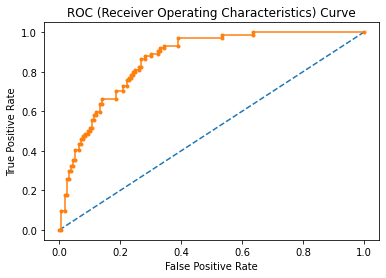

In [284]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = gnb.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_gnb = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_gnb)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.637 auc_pr=0.688 ap=0.697


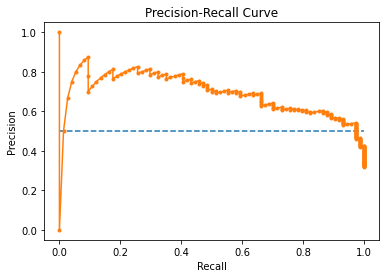

In [285]:
# Precision Recall Curve 

pred_y_test = gnb.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, gnb_y_pred)                                    # calculate F1 score
auc_gnb_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_gnb_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [286]:
models.append('GNB')
model_accuracy.append(accuracy_score(y_test, gnb_y_pred))
model_f1.append(f1)
model_auc.append(auc_gnb)

In [287]:
model_summary = pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc), columns = ['model','accuracy','f1_score','auc'])
model_summary = model_summary.set_index('model')

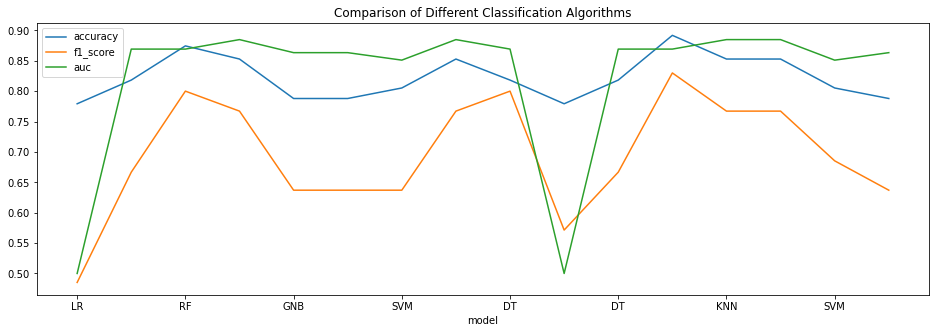

In [288]:
model_summary.plot(figsize=(16,5))
plt.title("Comparison of Different Classification Algorithms");

In [289]:
model_summary

,accuracy,f1_score,auc
model,,,
LR,0.779221,0.485246,0.500000
DT,0.818182,0.666667,0.869169
RF,0.874459,0.800000,0.869169
KNN,0.852814,0.767123,0.884791
GNB,0.787879,0.637037,0.863316
GNB,0.787879,0.637037,0.863316
SVM,0.805195,0.637037,0.851007
KNN,0.852814,0.767123,0.884791
DT,0.818182,0.800000,0.869169


#### Out of all the models, RandomForest has given the best accuracy and f1_score. Therefore, we will build the final model using RandomForest.

### FINAL CLASSIFIER:

In [290]:
final_model = rf2

## Week 4: 

### Data Modeling: 

#### (1) Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used:

In [293]:
cr = classification_report(y_test, final_model.predict(X_test))
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       157
           1       0.84      0.82      0.83        74

    accuracy                           0.89       231
   macro avg       0.88      0.87      0.88       231
weighted avg       0.89      0.89      0.89       231



In [294]:
confusion = confusion_matrix(y_test, final_model.predict(X_test))
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[145  12]
 [ 13  61]]


In [295]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = TP/(TP+FP)
Sensitivity = TP/(TP+FN)                     # also called recall
Specificity = TN/(TN+FP)

In [296]:
print("Accuracy: %.3f"%Accuracy)
print("Precision: %.3f"%Precision)
print("Sensitivity: %.3f"%Sensitivity)
print("Specificity: %.3f"%Specificity)
print("AUC: %.3f"%auc_rf)

Accuracy: 0.892
Precision: 0.836
Sensitivity: 0.824
Specificity: 0.924
AUC: 0.951


### Data Reporting: 

#### 2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

1. Pie chart to describe the diabetic or non-diabetic population
2. Scatter charts between relevant variables to analyze the relationships
3. Histogram or frequency charts to analyze the distribution of the data
4. Heatmap of correlation analysis among the relevant variables
5. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

### PLEASE REFER TABLEAU FILE FOR DASHBOARD AND VISUALIZATION CREATED FOR DATA REPORTING.